# ESILV - Python for data analysis - project 2022

## 1) All Import of project

In [1]:
#unavoidable import
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

#Import for part 3
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

#Import for part 4

#Import for part 5
import time
from decimal import *

#Import for part 6
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

!pip install xgboost
!brew install libomp
from xgboost import XGBRegressor

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
#Import for the part 7

#Other import
import warnings
warnings.filterwarnings('ignore')

'brew' n'est pas reconnu en tant que commande interne
ou externe, un programme ex‚cutable ou un fichier de commandes.


In [2]:
#Charge the Dataset
SeoulBikeDf = pd.read_csv("SeoulBikeData.csv", encoding="latin1")
#We display it
SeoulBikeDf.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


## 2) Quick Analyze

 - Dataset : Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern.

 - Target : The good renter number of bike by hours.

In [3]:
#Size of the dataset
print('Number of columns : ' +  str(SeoulBikeDf.shape[1]))
print('Number of row : ' + str(SeoulBikeDf.shape[0]))

Number of columns : 14
Number of row : 8760


In [4]:
#Check type of columns
SeoulBikeDf.dtypes

Date                          object
Rented Bike Count              int64
Hour                           int64
Temperature(°C)              float64
Humidity(%)                    int64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature(°C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Seasons                       object
Holiday                       object
Functioning Day               object
dtype: object

In [5]:
#Why 8760 row ?
SeoulBikeDf.groupby("Date")["Rented Bike Count"].count()
# We can confirm that we have exactly 1 years of dataset because : 24 * 365 = 8760

Date
01/01/2018    24
01/02/2018    24
01/03/2018    24
01/04/2018    24
01/05/2018    24
              ..
31/05/2018    24
31/07/2018    24
31/08/2018    24
31/10/2018    24
31/12/2017    24
Name: Rented Bike Count, Length: 365, dtype: int64

## 3) Clear the dataset

In [6]:
#Check is Nan value in the dataframe
print ('Missing values in the dataset ? -> ' + str(SeoulBikeDf.isnull().values.any()))
print ('Improper values in the dataset ? -> ' + str(SeoulBikeDf.isna().values.any()))

Missing values in the dataset ? -> False
Improper values in the dataset ? -> False


In [7]:
#Transformation quantitative variable to vector
print('Before transformation of Functioning Day : ' + str(SeoulBikeDf['Functioning Day'].unique()))
SeoulBikeDf['Functioning Day'] = SeoulBikeDf['Functioning Day'].replace(to_replace=['No', 'Yes'], value=[0, 1])
print('After transformation of Functioning Day : ' + str(SeoulBikeDf['Functioning Day'].unique()) + "\n")

print('Before transformation of Holiday : ' + str(SeoulBikeDf['Holiday'].unique()))
SeoulBikeDf['Holiday'] = SeoulBikeDf['Holiday'].replace(to_replace=['No Holiday', 'Holiday'], value=[0, 1])
print('After transformation of Holiday : ' + str(SeoulBikeDf['Holiday'].unique()) + "\n")

print('Before transformation of Seasons : ' + str(SeoulBikeDf['Seasons'].unique()))
SeoulBikeDf['Seasons'] = SeoulBikeDf['Seasons'].replace(to_replace=['Winter', 'Spring', 'Summer', 'Autumn'], value=[0, 1, 2, 3])
print('After transformation of Season : ' + str(SeoulBikeDf['Seasons'].unique()) + "\n")

Before transformation of Functioning Day : ['Yes' 'No']
After transformation of Functioning Day : [1 0]

Before transformation of Holiday : ['No Holiday' 'Holiday']
After transformation of Holiday : [0 1]

Before transformation of Seasons : ['Winter' 'Spring' 'Summer' 'Autumn']
After transformation of Season : [0 1 2 3]



In [8]:
#We transfrom Date data into 4 new columns :  day, month, years and dayofweek
SeoulBikeDf['Years'] = pd.to_datetime(SeoulBikeDf['Date']).dt.year
SeoulBikeDf['Month'] = pd.to_datetime(SeoulBikeDf['Date']).dt.month
SeoulBikeDf['Day'] = pd.to_datetime(SeoulBikeDf['Date']).dt.day
SeoulBikeDf['Dayofweek'] = pd.to_datetime(SeoulBikeDf['Date']).dt.dayofweek

#Monday starting at 0 so we add + 1 at all the colomn
SeoulBikeDf['Dayofweek'] += 1 

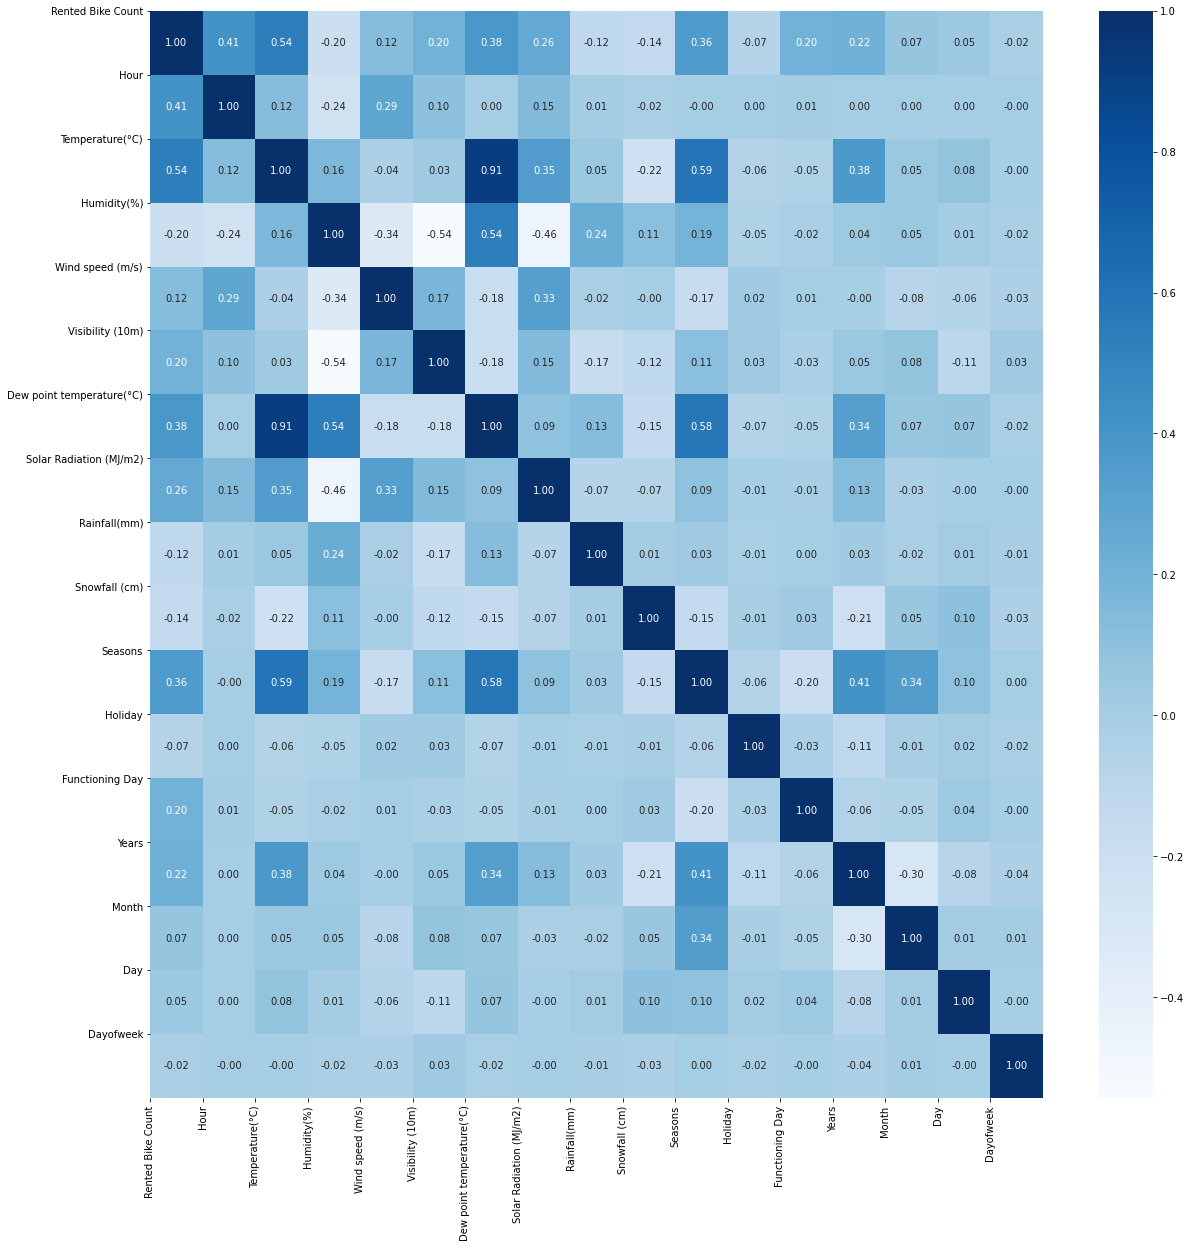

In [9]:
#Create Correlation Dataframe
corr = SeoulBikeDf.corr()

# Plot figsize and Generate Color Map
fig, ax = plt.subplots(figsize=(20, 20))
colormap = sns.diverging_palette(220, 10, as_cmap=True)

#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap="Blues", annot=True, fmt=".2f")

#Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
plt.yticks(range(len(corr.columns)), corr.columns)

plt.show()

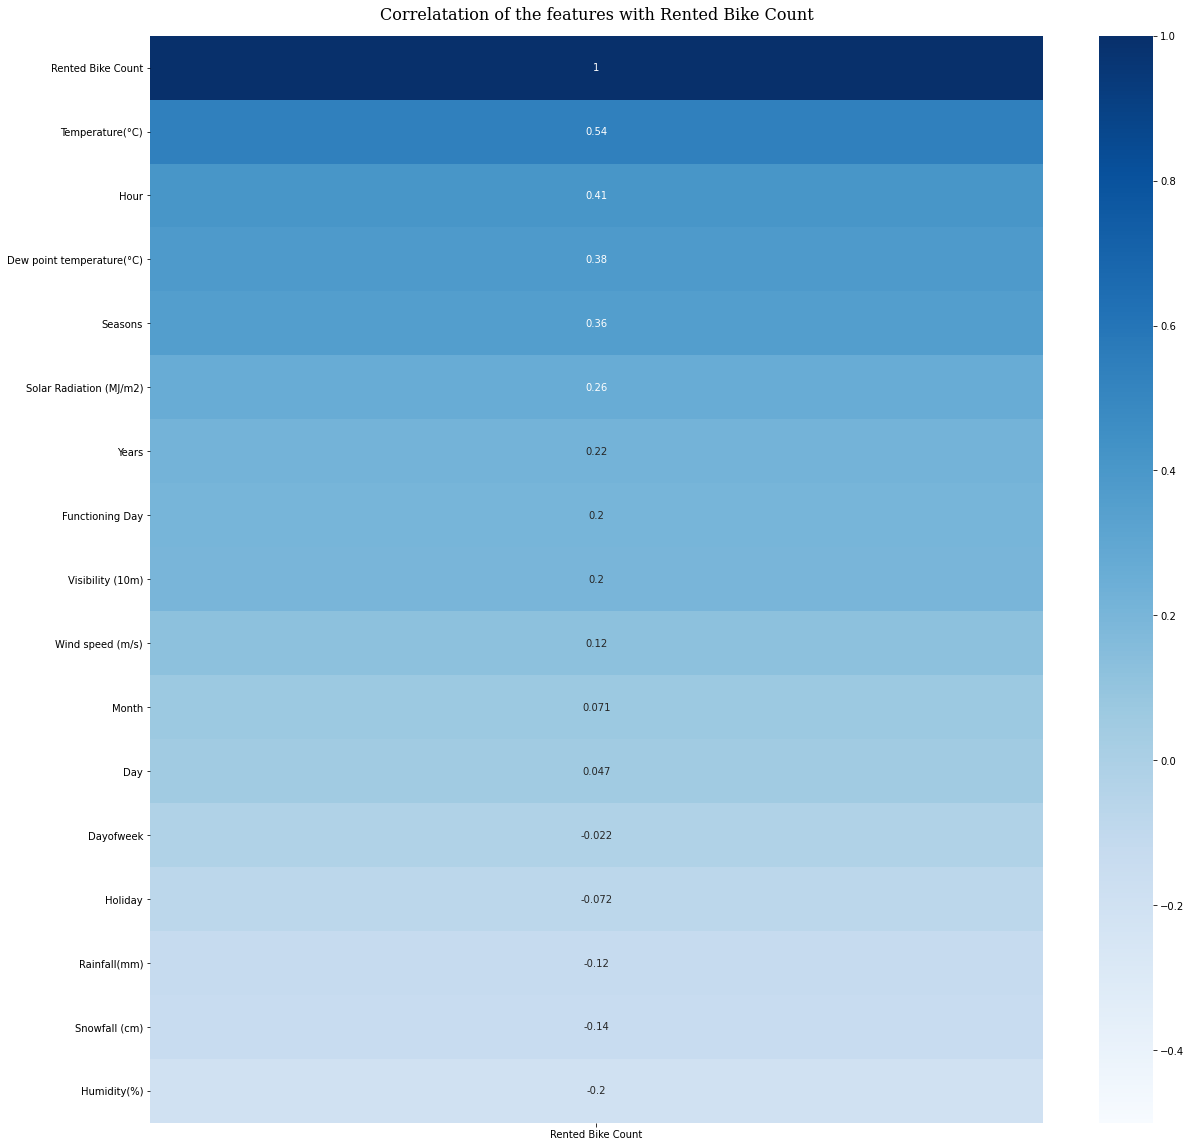

In [10]:
plt.figure(figsize=(20,20))
heatmap = sns.heatmap(SeoulBikeDf.corr()[['Rented Bike Count']].sort_values(by='Rented Bike Count', ascending=False), vmin=-0.5, vmax=1, annot=True, cmap='Blues')
heatmap.set_title('Correlatation of the features with Rented Bike Count', pad=16, fontdict={'family': 'serif','size': 16});

In [11]:
# Check min and max value for a potential scaling
col1 = ['Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']
col2 = [str(SeoulBikeDf['Temperature(°C)'].min()), str(SeoulBikeDf['Humidity(%)'].min()), str(SeoulBikeDf['Wind speed (m/s)'].min()), str(SeoulBikeDf['Visibility (10m)'].min()), str(SeoulBikeDf['Dew point temperature(°C)'].min()), str(SeoulBikeDf['Solar Radiation (MJ/m2)'].min()), str(SeoulBikeDf['Rainfall(mm)'].min()), str(SeoulBikeDf['Snowfall (cm)'].min())]
col3 = [str(SeoulBikeDf['Temperature(°C)'].max()), str(SeoulBikeDf['Humidity(%)'].max()), str(SeoulBikeDf['Wind speed (m/s)'].max()), str(SeoulBikeDf['Visibility (10m)'].max()), str(SeoulBikeDf['Dew point temperature(°C)'].max()), str(SeoulBikeDf['Solar Radiation (MJ/m2)'].max()), str(SeoulBikeDf['Rainfall(mm)'].max()), str(SeoulBikeDf['Snowfall (cm)'].max())]
SeoulBikeDfMinMax = pd.DataFrame({'Name': col1, 'Min': col2, 'Max': col3})
SeoulBikeDfMinMax

,Name,Min,Max
0,Temperature(°C),-17.8,39.4
1,Humidity(%),0,98
2,Wind speed (m/s),0.0,7.4
3,Visibility (10m),27,2000
4,Dew point temperature(°C),-30.6,27.2
5,Solar Radiation (MJ/m2),0.0,3.52
6,Rainfall(mm),0.0,35.0
7,Snowfall (cm),0.0,8.8


In [12]:
# For make differents testing we create 5 datasets for testing different model 

# First dataset is with qualitative brut data
SeoulBikeDf1 = SeoulBikeDf.copy().drop(['Date', 'Dayofweek'], axis = 1)


# Second Dataset without years and the dew temperature
SeoulBikeDf2 = SeoulBikeDf.copy().drop(['Date', 'Dew point temperature(°C)','Years'], axis = 1)


# Third Dataset without bad correlations columns
SeoulBikeDf3 = SeoulBikeDf2.copy()
SeoulBikeDf3 = SeoulBikeDf3.drop(['Humidity(%)', 'Rainfall(mm)', 'Snowfall (cm)', 'Holiday'], axis = 1)


# Fourth dataset have a new columns which scale the visibility
SeoulBikeDf4 = SeoulBikeDf3.copy()
SeoulBikeDf4_scaled = MinMaxScaler().fit_transform(SeoulBikeDf4.to_numpy())
SeoulBikeDf4_scaled = pd.DataFrame(SeoulBikeDf4_scaled, columns=['Rented Bike Count','Hour','Temperature(°C)','Wind speed (m/s)','Visibility (10m)','Solar Radiation (MJ/m2)','Seasons','Functioning Day','Month','Day','Dayofweek'])
SeoulBikeDf4['Visibility (10m)'] = SeoulBikeDf4_scaled['Visibility (10m)']


#Last Dataset remplace weather data by integer corresponding to a type
SeoulBikeDf5 = SeoulBikeDf2.copy()
# Rainfall and Snowfall is 1 if they are water on the road
SeoulBikeDf5['Rainfall(mm)'] = SeoulBikeDf5['Rainfall(mm)'].apply(lambda x: 1 if x > 0 else 0)
SeoulBikeDf5['Snowfall (cm)'] = SeoulBikeDf5['Snowfall (cm)'].apply(lambda x: 1 if x > 0 else 0)
# Humidity
SeoulBikeDf5.loc[SeoulBikeDf5['Humidity(%)'] <= 40, 'Humidity(%)'] = 0
SeoulBikeDf5.loc[SeoulBikeDf5['Humidity(%)'] >= 70, 'Humidity(%)'] = 2
SeoulBikeDf5.loc[SeoulBikeDf5['Humidity(%)'] < 2, 'Humidity(%)'] = 1
# Visibility
SeoulBikeDf5.loc[SeoulBikeDf5['Visibility (10m)'] <= 40, 'Visibility (10m)'] = 0
SeoulBikeDf5.loc[SeoulBikeDf5['Visibility (10m)'] >= 80, 'Visibility (10m)'] = 2
SeoulBikeDf5.loc[SeoulBikeDf5['Visibility (10m)'] < 2, 'Visibility (10m)'] = 1
#Wind Speed is according to the Beaufort scale, moderate wind below 12km/h <=> 3.3m/s
SeoulBikeDf5['Wind speed (m/s)'] = SeoulBikeDf5['Wind speed (m/s)'].apply(lambda x: 1 if x >= 3.3 else 0)
#Rename coloms
SeoulBikeDf5 = SeoulBikeDf5.rename({'Rainfall(mm)': 'Rainfall', 'Snowfall (cm)': 'Snowfall', 'Humidity(%)': 'Humidity', 'Visibility (10m)': 'Visibility', 'Wind speed (m/s)': 'Wind speed'}, axis=1)
SeoulBikeDf5.dtypes

Rented Bike Count            int64
Hour                         int64
Temperature(°C)            float64
Humidity                     int64
Wind speed                   int64
Visibility                   int64
Solar Radiation (MJ/m2)    float64
Rainfall                     int64
Snowfall                     int64
Seasons                      int64
Holiday                      int64
Functioning Day              int64
Month                        int64
Day                          int64
Dayofweek                    int64
dtype: object

## 4) Data-visualization

In [14]:
#We create sum dataframe for scattler plot
dfDay = SeoulBikeDf.groupby('Date').agg({'Rented Bike Count': ['sum'], 'Temperature(°C)': ['mean'], 'Humidity(%)': ['mean'], 'Wind speed (m/s)': ['mean'], 'Visibility (10m)': ['mean'], 'Dew point temperature(°C)': ['mean'], 'Solar Radiation (MJ/m2)': ['mean'], 'Rainfall(mm)': ['mean'], 'Snowfall (cm)': ['mean'], 'Seasons': ['mean'], 'Holiday': ['mean'], 'Functioning Day': ['mean'],'Month':['mean']})
dfDay.head()

,Rented Bike Count,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Month
,sum,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Date,,,,,,,,,,,,,
01/01/2018,4290,-1.283333,39.333333,1.454167,1894.833333,-13.866667,0.255833,0.000000,0.000000,0,1,1.0,1
01/02/2018,5377,-3.866667,44.000000,1.608333,1923.625000,-15.012500,0.337083,0.000000,0.904167,0,0,1.0,1
01/03/2018,5132,0.450000,64.208333,3.554167,1084.000000,-6.387500,0.747500,0.104167,0.000000,1,1,1.0,1
01/04/2018,17388,15.183333,68.916667,1.570833,831.833333,9.370833,0.302083,0.000000,0.000000,1,0,1.0,1
01/05/2018,26820,20.341667,72.791667,1.437500,456.458333,15.120833,0.517500,0.000000,0.000000,1,1,1.0,1


In [15]:
#We create sum dataframe for scattler plot
dfHour = SeoulBikeDf.groupby('Hour').agg({'Rented Bike Count': ['sum'], 'Temperature(°C)': ['mean'], 'Humidity(%)': ['mean'], 'Wind speed (m/s)': ['mean'], 'Visibility (10m)': ['mean'], 'Dew point temperature(°C)': ['mean'], 'Solar Radiation (MJ/m2)': ['mean'], 'Rainfall(mm)': ['mean'], 'Snowfall (cm)': ['mean'], 'Seasons': ['mean'], 'Holiday': ['mean'], 'Functioning Day': ['mean']})
dfHour.head()

,Rented Bike Count,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
,sum,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Hour,,,,,,,,,,,,
0,197633,11.286301,64.997260,1.453699,1433.380822,4.543014,0.0,0.145205,0.061644,1.50411,0.049315,0.964384
1,155557,10.923288,66.128767,1.284110,1414.813699,4.470959,0.0,0.062192,0.073699,1.50411,0.049315,0.964384
2,110095,10.591507,67.306849,1.223836,1382.597260,4.438904,0.0,0.096986,0.076438,1.50411,0.049315,0.964384
3,74216,10.293699,68.136986,1.197534,1358.635616,4.402740,0.0,0.146849,0.076712,1.50411,0.049315,0.964384
4,48396,10.026301,68.731507,1.217260,1339.284932,4.308219,0.0,0.155616,0.076438,1.50411,0.049315,0.964384


In [17]:
dfMonth = SeoulBikeDf.groupby('Month').agg({'Rented Bike Count': ['sum'], 'Temperature(°C)': ['mean'], 'Humidity(%)': ['mean'], 'Wind speed (m/s)': ['mean'], 'Visibility (10m)': ['mean'], 'Dew point temperature(°C)': ['mean'], 'Solar Radiation (MJ/m2)': ['mean'], 'Rainfall(mm)': ['mean'], 'Snowfall (cm)': ['mean'], 'Seasons': ['mean'], 'Holiday': ['mean'], 'Functioning Day': ['mean']})
dfMonth

,Rented Bike Count,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
,sum,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Month,,,,,,,,,,,,
1,287244,2.722849,52.931452,1.813038,1392.811828,-6.599059,0.355175,0.121371,0.250269,0.580645,0.096774,1.000000
2,264112,6.484375,51.785714,1.838393,1451.800595,-3.832143,0.510818,0.149702,0.066518,0.642857,0.107143,0.964286
3,455037,11.436694,59.829301,1.913844,1241.911290,3.104570,0.595403,0.094220,0.002957,1.193548,0.032258,0.967742
4,556219,13.711250,53.630556,1.852639,1440.533333,3.188889,0.733667,0.149583,0.000000,1.200000,0.000000,0.966667
5,665948,16.620296,60.740591,1.759409,1348.532258,8.294624,0.688911,0.290323,0.000000,1.193548,0.032258,1.000000
6,706728,18.998194,65.637500,1.694583,1196.531944,11.730000,0.677778,0.359444,0.011944,1.800000,0.033333,0.956944
7,691339,23.125403,60.586022,1.664919,1527.458333,14.497446,0.777325,0.015054,0.013978,1.806452,0.000000,1.000000
8,614190,21.259140,62.998656,1.677151,1658.043011,13.169892,0.605296,0.324597,0.006048,1.806452,0.032258,1.000000


<AxesSubplot:xlabel='Date'>

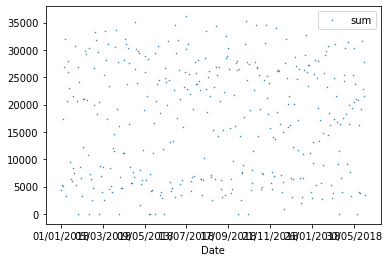

In [18]:
dfDay.plot(y="Rented Bike Count",linestyle="",marker=".",markersize=1)

We can see that during winter there are less bykes that are used.

<AxesSubplot:xlabel='Hour'>

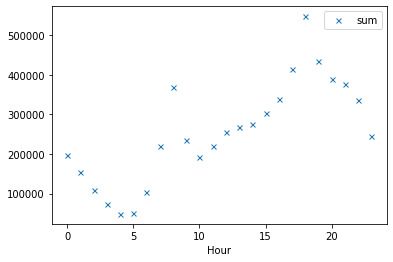

In [19]:
dfHour.plot(y="Rented Bike Count",linestyle="",marker="x",markersize=5)

<AxesSubplot:xlabel='Month'>

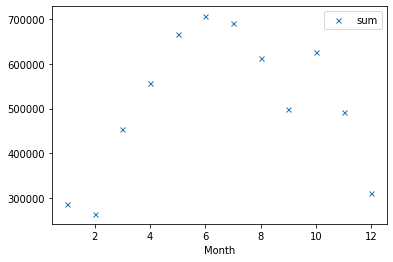

In [20]:
dfMonth.plot(y="Rented Bike Count",linestyle="",marker="x",markersize=5)

([<matplotlib.patches.Wedge at 0x22b4126bbe0>,
 [Text(1.0663566383192322, 0.2699694795944649, 'Winter'),
  Text(0.2768789886503531, 1.0645834986716438, 'Spring'),
  Text(-1.08641682842713, -0.17233245460544025, 'Summer'),
  Text(0.6741840289026949, -0.8691811636089052, 'Autumn')])

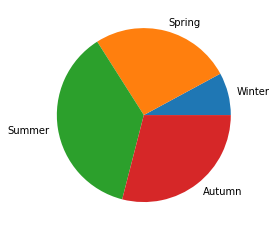

In [21]:
Winter=SeoulBikeDf[SeoulBikeDf["Seasons"]==0].sum()
Spring=SeoulBikeDf[SeoulBikeDf["Seasons"]==1].sum()
Summer=SeoulBikeDf[SeoulBikeDf["Seasons"]==2].sum()
Autumn=SeoulBikeDf[SeoulBikeDf["Seasons"]==3].sum()

BikeSeasons={"Winter":Winter["Rented Bike Count"],"Spring":Spring["Rented Bike Count"],"Summer":Summer["Rented Bike Count"],"Autumn":Autumn["Rented Bike Count"]}
plt.pie(BikeSeasons.values(),labels=BikeSeasons.keys())

([<matplotlib.patches.Wedge at 0x22b412baa00>,
 [Text(1.0944394325034628, 0.110464150662098, '0'),
  Text(1.0570518938701328, 0.3043703232339939, '1'),
  Text(1.0063747508917904, 0.4440831687505021, '2'),
  Text(0.9603509637694463, 0.5364009940213533, '3'),
  Text(0.9250278804230653, 0.5952507206547603, '4'),
  Text(0.8938197498928461, 0.6411600850813237, '5'),
  Text(0.8402473555223329, 0.7099185738785305, '6'),
  Text(0.7113861278835218, 0.8390052306481108, '7'),
  Text(0.4303769851135942, 1.012312032272922, '8'),
  Text(0.10246652309384852, 1.0952171527350445, '9'),
  Text(-0.1369029935679251, 1.0914474656858848, '10'),
  Text(-0.3610890337930605, 1.0390450951110806, '11'),
  Text(-0.5991686954770545, 0.9224949183384833, '12'),
  Text(-0.8207148893022327, 0.7324118175436715, '13'),
  Text(-0.9898162058294316, 0.47985818600647884, '14'),
  Text(-1.0865752142489264, 0.17133097729219873, '15'),
  Text(-1.0840422531410152, -0.18668795731099322, '16'),
  Text(-0.9349245062816057, -0.5795

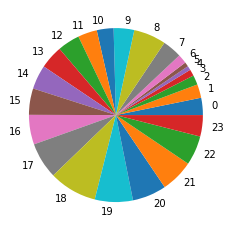

In [22]:
BikeHours={}
for k in range(24):
    BikeHours[k]=SeoulBikeDf[SeoulBikeDf["Hour"]==k].sum()["Rented Bike Count"]
plt.pie(BikeHours.values(),labels=BikeHours.keys())

<BarContainer object of 24 artists>

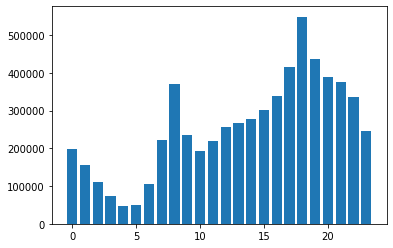

In [23]:
plt.bar(BikeHours.keys(),BikeHours.values())

## 5) Utils

In [24]:
# Function which return the grid fitting
def GetScoreHyperparametres(algo, x, y, hyperparametres):
    grid = GridSearchCV(algo, hyperparametres, n_jobs=-1)
    grid.fit(x, y)
    ExactScore = round(grid.score(x,y) * 100,2)
    
    print('Best Accuracy for this model : ' + str(ExactScore) + '% with hyperparametres : ' + str(grid.best_estimator_))
    return grid , ExactScore

In [25]:
# Function for calculate the time for the scoring fitting and return a tuple
def TimeOfModel(func,*args):
    start_time = time.time()
    return func(*args) , round(time.time() - start_time,3)

In [26]:
# Function which return the accuracy in (%) of prediction 
def ApproxAccuracy(predict,result):
    predict = pd.Series(predict) 
    FusionDf = pd.DataFrame(result.subtract(predict, fill_value=0).abs())
    FusionDfRestant = FusionDf.loc[(FusionDf[0] <= 5)]
    return (len(FusionDfRestant) * 100) / len(FusionDf)

In [27]:
# For each model we display all accuracy and we stock only the best
def BestModelWithoutTraining(namefunc, func):
    bestModel = 1
    bestModelTime = 0
    bestModelExactValue = 0
    bestModelApproxValue = 0
    incModel = 1
    
    for x in listFeatures:
        exactmodel = TimeOfModel(func, x, y, False)
        print(namefunc + 'Model ' + str(incModel) + ' exactly : ' + str(exactmodel[0]) + '% in ' + str(exactmodel[1]) + 'secondes')
        approxmodel = TimeOfModel(func, x, y, True)
        print(namefunc + 'Model ' + str(incModel) + ' approx : ' + str(approxmodel[0]) + '% in ' + str(approxmodel[1]) + 'secondes')
        if(bestModelExactValue < exactmodel[0]):
                bestModel = incModel
                bestModelTime = exactmodel[1]
                bestModelExactValue = exactmodel[0]
                bestModelApproxValue = approxmodel[0]
        incModel = incModel + 1
    print("Best exact" + namefunc + " model is : " + str(bestModel) + " with " + str(bestModelExactValue) + '%')
    return [namefunc, str(bestModel), bestModelTime, bestModelExactValue, bestModelApproxValue]

In [28]:
#function for take the gridsearch on all model
def BestModelWithTraining(namefunc, func, algo, hyperparametres):
    bestModel = 1
    bestModelTime = 0
    bestModelExactValue = 0
    bestModelApproxValue = 0
    incModel = 1
    for i in listFeatures:
        print('Calcul du model ' + str(incModel) + ' en cours ...')
        x_train, x_test, y_train, y_test = train_test_split(i, y, test_size=0.33)
        
        #Scale
        scaler = StandardScaler()
        scaler.fit(x_train)       
        x_train = scaler.transform(x_train, copy = False)
        x_test  = scaler.transform(x_test, copy = False)
        
        #Find Model
        InfoModel , time = TimeOfModel(func, algo, x_train, y_train, hyperparametres)           
        approxModelAccuracy = round( ApproxAccuracy(InfoModel[0].predict(i),y), 2)
        
        #Save the best model
        if(bestModelExactValue < InfoModel[1]):
                bestModel = incModel
                bestModelTime = time
                bestModelExactValue = InfoModel[1]
                bestModelApproxValue = approxModelAccuracy
        incModel = incModel + 1
    print("Best exact" + namefunc + " model is : " + str(bestModel) + " with " + str(bestModelExactValue) + '%')
    return [namefunc, bestModel, bestModelTime, bestModelExactValue, bestModelApproxValue]

In [29]:
# Generate a dataframe or we stock the best model for each methods
ResultDf = pd.DataFrame()
def StockResultDf(tab):
    global ResultDf
    df2 = {'Model Name': tab[0], 'bestModel': tab[1], 'Time(s)': tab[2], 'Exact Value (%)' : tab[3], 'Approx Value(%)' : tab[4]}
    ResultDf = ResultDf.append(df2,ignore_index=True)

## 6) Data-visualization

In [30]:
#We separe the target of features
#Target for first methods
y = SeoulBikeDf1["Rented Bike Count"]

#Features
x1 = SeoulBikeDf1.drop(['Rented Bike Count'], axis = 1)
x2 = SeoulBikeDf2.drop(['Rented Bike Count'], axis = 1)
x3 = SeoulBikeDf3.drop(['Rented Bike Count'], axis = 1)
x4 = SeoulBikeDf4.drop(['Rented Bike Count'], axis = 1)
x5 = SeoulBikeDf5.drop(['Rented Bike Count'], axis = 1)

#Create list for features
listFeatures = [x1, x2, x3, x4, x5]

In [31]:
def KNN(x,y,approx):
    KnnModel = KNeighborsClassifier(n_neighbors=2)
    KnnModel.fit(x,y)
    if(approx):
        return round(ApproxAccuracy(KnnModel.predict(x),y), 2)
    else:
        return round(KnnModel.score(x,y) * 100,2)

In [32]:
#KNN Model
StockResultDf(BestModelWithoutTraining("KNN", KNN))

KNNModel 1 exactly : 51.1% in 0.349secondes
KNNModel 1 approx : 52.57% in 0.272secondes
KNNModel 2 exactly : 50.84% in 0.281secondes
KNNModel 2 approx : 52.24% in 0.268secondes
KNNModel 3 exactly : 51.22% in 0.264secondes
KNNModel 3 approx : 52.48% in 0.25secondes
KNNModel 4 exactly : 49.47% in 0.238secondes
KNNModel 4 approx : 51.61% in 0.256secondes
KNNModel 5 exactly : 49.63% in 0.364secondes
KNNModel 5 approx : 51.77% in 0.364secondes
Best exactKNN model is : 3 with 51.22%


In [33]:
#Linear Regression model
def LinearRegressionModel(x,y,approx):
    LinearModel = LinearRegression().fit(x, y)
    if(approx):
        return round(ApproxAccuracy(LinearModel.predict(x),y),2)
    else:
        return round(LinearModel.score(x,y) * 100,2)

In [34]:
StockResultDf(BestModelWithoutTraining("Linear Regression", LinearRegressionModel))
ResultDf

Linear RegressionModel 1 exactly : 54.5% in 0.033secondes
Linear RegressionModel 1 approx : 1.12% in 0.01secondes
Linear RegressionModel 2 exactly : 54.53% in 0.008secondes
Linear RegressionModel 2 approx : 1.02% in 0.011secondes
Linear RegressionModel 3 exactly : 50.11% in 0.007secondes
Linear RegressionModel 3 approx : 1.14% in 0.008secondes
Linear RegressionModel 4 exactly : 50.11% in 0.007secondes
Linear RegressionModel 4 approx : 1.14% in 0.006secondes
Linear RegressionModel 5 exactly : 54.48% in 0.01secondes
Linear RegressionModel 5 approx : 1.15% in 0.01secondes
Best exactLinear Regression model is : 2 with 54.53%


,Approx Value(%),Exact Value (%),Model Name,Time(s),bestModel
0,52.48,51.22,KNN,0.264,3
1,1.02,54.53,Linear Regression,0.008,2


In [35]:
#FIND with Grid Search the better hyperparameters for model 1
#Create train and test set
x_train, x_test, y_train, y_test = train_test_split(x1, y, test_size=0.33)

#Scale
scaler = StandardScaler()
scaler.fit(x_train)                 # Il ne faut fiter que sur les data d'entrainement
x_train = scaler.transform(x_train, copy = False)
x_test  = scaler.transform(x_test, copy = False)

In [36]:
# Going further default parameters to grid search
parameters = {'gamma':[0.01, 0.025, 0.05, 0.75, 0.1, 0.25, 0.5]}
grid = GridSearchCV(svm.SVR(), parameters, n_jobs=-1, cv=5)
grid.fit(x_train,y_train)
print('Best Accuracy : ' + str(round(grid.best_score_ * 100,2)) + '% with Gamma : ' + str(grid.best_estimator_))

Best Accuracy : 27.03% with Gamma : SVR(gamma=0.05)


In [37]:
# Remake for find the better gamma and a good C
parameters = {'gamma':[0.03, 0.04, 0.05, 0.06 ,0.07], 'C' : [0.5, 1, 2, 3, 5, 10]}
grid = GridSearchCV(svm.SVR(), parameters, n_jobs=-1, cv=5)
grid.fit(x_train,y_train)
print('Best Accuracy : ' + str(round(grid.best_score_ * 100,2)) + '% with Gamma and C : ' + str(grid.best_estimator_))

Best Accuracy : 61.36% with Gamma and C : SVR(C=10, gamma=0.07)


In [38]:
# Now we Find the degree and affine C
parameters = {'gamma' : [0.065,0.07,0.075], 'C' : [10, 15, 20], 'degree' : [0.15, 0.25, 0.5]}
grid = GridSearchCV(svm.SVR(), parameters, n_jobs=-1, cv=5)
grid.fit(x_train,y_train)
print('Best Accuracy : ' + str(round(grid.best_score_ * 100,3)) + '% with Gamma , degree and C : ' + str(grid.best_estimator_))

Best Accuracy : 65.502% with Gamma , degree and C : SVR(C=20, degree=0.15, gamma=0.075)


In [39]:
# Finish by search the kernel
parameters = {'C' : [20, 50, 100], 'kernel' : ['rbf','poly','sigmoid','linear'], 'gamma' : [0.073, 0.075, 0.077], 'degree' : [0.10, 0.15, 0.20]}
grid = GridSearchCV(svm.SVR(), parameters, n_jobs=-1, cv=5)
grid.fit(x_train,y_train)
print('Best Accuracy : ' + str(round(grid.best_score_ * 100,3)) + '% with Gamma, C, degree : ' + str(grid.best_estimator_))

Best Accuracy : 71.464% with Gamma, C, degree : SVR(C=100, degree=0.1, gamma=0.077)


In [40]:
#We retake this for all models because is the same best hyperparameters
params = {
            'C' : [20, 50, 100], 
            'kernel' : ['rbf','poly','sigmoid','linear'], 
            'gamma' : [0.073, 0.075, 0.077], 
            'degree' : [0.10, 0.15, 0.20]
}
StockResultDf(BestModelWithTraining('GridSearch',GetScoreHyperparametres,svm.SVR(),params))
ResultDf

Calcul du model 1 en cours ...


KeyboardInterrupt: 

In [ ]:
#Lasso
params = {  
            "max_iter"  : [ 250, 500, 1000, 1500 ],
            "alpha"     : [ 0.01, 0.025, 0.05, 0.1, 0.25, 0.5, 0.8, 1.0], 
            "selection" : ["random", "cyclic"]
}
StockResultDf(BestModelWithTraining('Lasso', GetScoreHyperparametres, Lasso(), params))
ResultDf

In [ ]:
#Extra trees
params = {
    "n_estimators"         : [50, 100, 150],
    'max_depth'            : [4],
    'bootstrap'            : [True,False]
}
StockResultDf(BestModelWithTraining('ExtraTrees', GetScoreHyperparametres, ExtraTreesRegressor(), params))
ResultDf

In [ ]:
#Random Forest
params = {
    "n_estimators"         : [50, 100, 150],
    'max_depth'            : [4],
    'bootstrap'            : [True,False]
}
StockResultDf(BestModelWithTraining('Random Forest', GetScoreHyperparametres, RandomForestRegressor(), params))
ResultDf

In [ ]:
#XGBoost
params = {
    "max_depth" : [4],
    "gamma" : [0.077, 0.5, 0.75, 1]
}
StockResultDf(BestModelWithTraining('XGBoost', GetScoreHyperparametres, XGBRegressor(), params))
ResultDf

In [ ]:
# Reseaux de neurone


In [ ]:
# API


In [ ]:
# FONCTION POUR AFFICHER LES RESIDU ( voir tp5 scikit learn)
# TO DO faire une petite fonction ou integrer dans une autre pour créer les call de save puis d'afficher le dataframe
# Check si on peut refaire des graphs